<a href="https://colab.research.google.com/github/songqsh/18ma573pub/blob/bra1/src/vol_smile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Volatility smile



Volatility smiles are implied volatility patterns that arise in pricing financial options.  It corresponds to finding one single parameter (implied volatility) that is needed to be modified for the Black-Scholes formula to fit market prices. Graphing implied volatilities against strike prices for a given expiry yields a skewed "smile" instead of the expected flat surface.

Next, we shall demonstrate volatility smiles by computing implied volatility to multiple market option prices. For instance, we can fix the maturity, and compute volatilities for different strikes. If we plot a strike versus vol figure , we shall see the smily face there.



- For preparation, we first upload "src/optiondata2.dat" manually to GitHub. This data is cooked up from some stock model, which will be revealed later.

- git clone repo to colab

In [0]:
'''======
run once, then comment it off, and run again
========'''
#!git clone https://github.com/songqsh/18ma573pub.git 
pass

- Change working dir to "reponame/src", also needs run once, and comment it out from the second run.

In [2]:
cd 18ma573pub/src/

/content/18ma573pub/src


- 
here we import our own python modules and common modules


In [0]:
import european_options_class as eoc
import sde_class as sde

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as so

- Read data from .dat file. It has call option prices of 
  - maturities 2 months and 5 months;
  - strikes of 97, 99, 101, 103

In [5]:
'''======
Read data
========='''
#Read four-column data
#columns are otype, maturity, strike, option_price
np_option_data1 = np.loadtxt('optiondata2.dat', comments='#', delimiter=',')

print('>>>>>>otype, maturity, strike, option_price')
print(np_option_data1)

>>>>>>otype, maturity, strike, option_price
[[  1.           0.16666667  97.           5.32705461]
 [  1.           0.16666667  99.           3.86224255]
 [  1.           0.16666667 101.           2.7204371 ]
 [  1.           0.16666667 103.           2.1202793 ]
 [  1.           0.41666667  97.           7.23756307]
 [  1.           0.41666667  99.           5.95053461]
 [  1.           0.41666667 101.           5.2640122 ]
 [  1.           0.41666667 103.           4.97493422]]


- We also need to give spot price and interest rate before the computation.

In [0]:
#below are market data 
spot_price = 100
interest_rate = .05

In [0]:
#expand one column for vol
num_row = np_option_data1.shape[0]
np_option_data2 = np.append(np_option_data1, np.zeros([num_row,1]), axis = 1)

In [0]:
'''==========
define a method to seek for an implied volatility
============'''

def error_function(vol, gbm, option, market_option_price):
  gbm.vol_ratio = vol
  return np.abs(market_option_price - gbm.bsm_price(option))

def implied_volatility(gbm, option, market_option_price):
  init_vol = .1 #initial guess
  return so.fmin(error_function, init_vol, 
                 args = (gbm, option, market_option_price), disp = 0)[0]

In [9]:
#compute implied vols and add them into the last column
for i in range(num_row):
  gbm1 = sde.Gbm(init_state = spot_price, 
                drift_ratio = interest_rate,
                vol_ratio = .1)
  option1 = eoc.EuropeanOption(otype = np_option_data2[i,0],
                              strike = np_option_data2[i,2],
                              maturity = np_option_data2[i,1]
                              )
  market_option_price = np_option_data2[i,3]
  np_option_data2[i,4] = implied_volatility(gbm1, option1, market_option_price)
  
print('>>>>>>otype, maturity, strike, option_price, implied vol')
print(np_option_data2)  

>>>>>>otype, maturity, strike, option_price, implied vol
[[  1.           0.16666667  97.           5.32705461   0.19125   ]
 [  1.           0.16666667  99.           3.86224255   0.17724609]
 [  1.           0.16666667 101.           2.7204371    0.17183594]
 [  1.           0.16666667 103.           2.1202793    0.18681641]
 [  1.           0.41666667  97.           7.23756307   0.170625  ]
 [  1.           0.41666667  99.           5.95053461   0.16804688]
 [  1.           0.41666667 101.           5.2640122    0.18373047]
 [  1.           0.41666667 103.           4.97493422   0.20901367]]


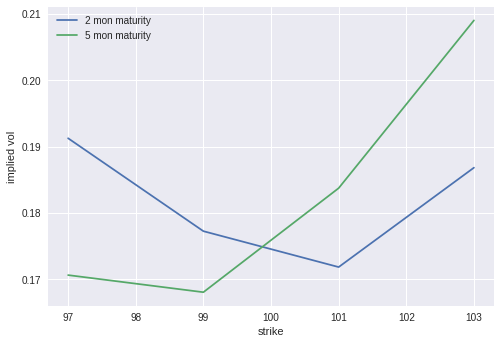

In [10]:
filter1 = np_option_data2[np_option_data2[:,1] == 2/12]
plt.plot(filter1[:,2], filter1[:,4], label = '2 mon maturity')
filter2 = np_option_data2[np_option_data2[:,1] == 5/12]
plt.plot(filter2[:,2], filter2[:,4], label = '5 mon maturity')
plt.ylabel('implied vol')
plt.xlabel('strike')
plt.legend();